## <span style="color:DarkOrchid">**Predicting Home Price In Bangalore**</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### <span style="color:GoldenRod ">**Load the Dataset**</span>

In [2]:
df1=pd.read_csv(r"F:\Machine Learning all Algorithms\Previous Company Project\Real Estate Price Prediction\bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
# Count the number of area type
# df1.area_type.value_counts() OR ⬇️

df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**Drop features that are not required to build our model**m

In [8]:
df2=df1.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### <span style="color:GoldenRod ">**Data Cleaning, Handling the missing values**</span>

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2=df2.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13246, 5)

### <span style="color:GoldenRod ">**Featuer Engineering**</span>
**Add new feature(int) for bhk(Bedroom Hall Kitchen)**

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

# Here the x in lambda conatins column value for each rows
#     then we split x with a space(' ') i.e 2 & bhk
#     above expression gives 2 tokens out which we take [0] i.e only the 1st element
# then convert it to integer 

In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


**Explore the total_sqft Feature**

In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Since there is a range of values, let's check if they are float or not 

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [17]:
# Now apply the function to the total_sqft using a ~ that returns all non floats

df2[~df2['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
# Let's def a funtion to take the range of values and return the average of them

def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:                                  #if there are 2 tokens, it means there is a range of values
        return(float(tokens[0])+float(tokens[1]))/len(tokens)   #splits the tokens and cal it's average
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_sqft_to_num('2100 - 2850')  #This function takes in the range of values and computes it's average

2475.0

In [20]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [21]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### <span style="color:GoldenRod ">**Featuer Engineering**</span>
**Add new feature called price per square feet**

In [22]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df4.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
len(df4.location.unique())      #lot's of locations here

1304

**We need to apply dimensionality reduction technique here to reduce number of locations**

In [25]:
df4['location']=df4['location'].apply(lambda x: x.strip())  #removes any spaces here
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

### <span style="color:GoldenRod ">**Dimesnionality Reduction**</span>
**Any Location having less than 10 data points should be tagged as other location. This will help us avoid dimensionality curse when we do one hot encoding.** 

In [26]:
#Finding how many locations have less than data points
len(location_stats[location_stats<=10])

1052

In [27]:
less_than_10_locations=location_stats[location_stats<=10]
print(less_than_10_locations)

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64


In [28]:
len(df4.location.unique())

1293

In [29]:
df4.location=df4.location.apply(lambda x: 'other' if x in less_than_10_locations else x)
len(df4.location.unique())

242

In [30]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### <span style="color:GoldenRod ">**Outlier Removal Using Business Logic**</span>
**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft**

In [31]:
df4[(df4.total_sqft/df4.bhk) < 300].head()          #Get houses with less than 300 sqft per bhk threshold

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**Here we got 6 bhk apartment with 1020 sqft, 8 bhk where total sqft is 600. These are clear data errors that can be removed safely**

In [32]:
df4.shape

(13246, 7)

In [33]:
df5=df4[~((df4.total_sqft/df4.bhk) < 300)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


### <span style="color:GoldenRod ">**Outlier Removal Using Standard Deviation**</span>

In [34]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here few property prices are less than INR 300 per sqft and few are INR 176470 per sqft. These are clearly outliers. We will remove these outliers from the dataset using mean and '1' standard deviation method.**

In [35]:
def remove_outliers_zscore(df):
    """
    Removes outliers in the price_per_sqft column for each location group
    based on the Z-score method (1 standard deviation threshold).
        
    Parameters:
    df (DataFrame): The input DataFrame containing 'location' and 'price_per_sqft'.
        
    Returns:
    DataFrame: A new DataFrame with outliers removed.
    """
    cleaned_df = pd.DataFrame()   # Initialize an empty DataFrame to store the cleaned data
    for location, group in df.groupby('location'):
        # Calculate the mean and standard deviation for each location group
        mean = group['price_per_sqft'].mean()
        std_dev = group['price_per_sqft'].std()
        # Apply the Z-score logic to filter out outliers
        filtered_group = group[(group['price_per_sqft'] > mean - std_dev) & (group['price_per_sqft'] < mean + std_dev)]
        # Append the filtered data to the cleaned DataFrame
        cleaned_df = pd.concat([cleaned_df, filtered_group], ignore_index=True)
    return cleaned_df

# Apply the function
df6=remove_outliers_zscore(df5)
df6.shape

(10291, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

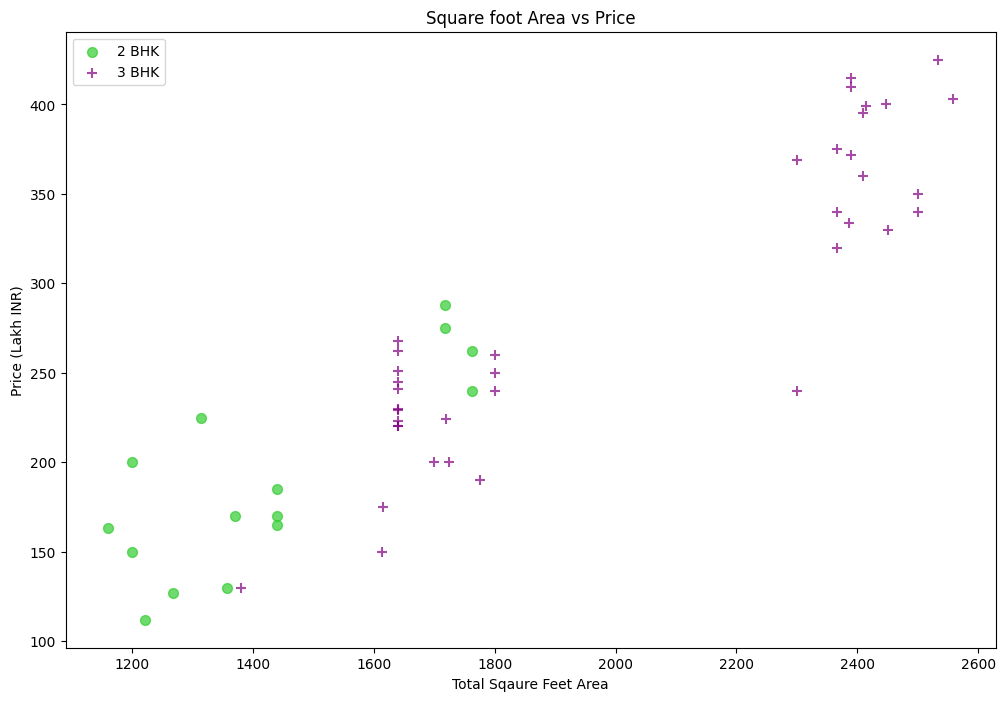

In [36]:
def scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(12,8))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='limegreen', label='2 BHK', s=50, alpha=0.7)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='purple', marker='+', label='3 BHK', s=50, alpha=0.7)
    plt.xlabel('Total Sqaure Feet Area')
    plt.ylabel('Price (Lakh INR)')
    plt.title('Square foot Area vs Price')
    plt.legend()

scatter_chart(df6, 'Rajaji Nagar')


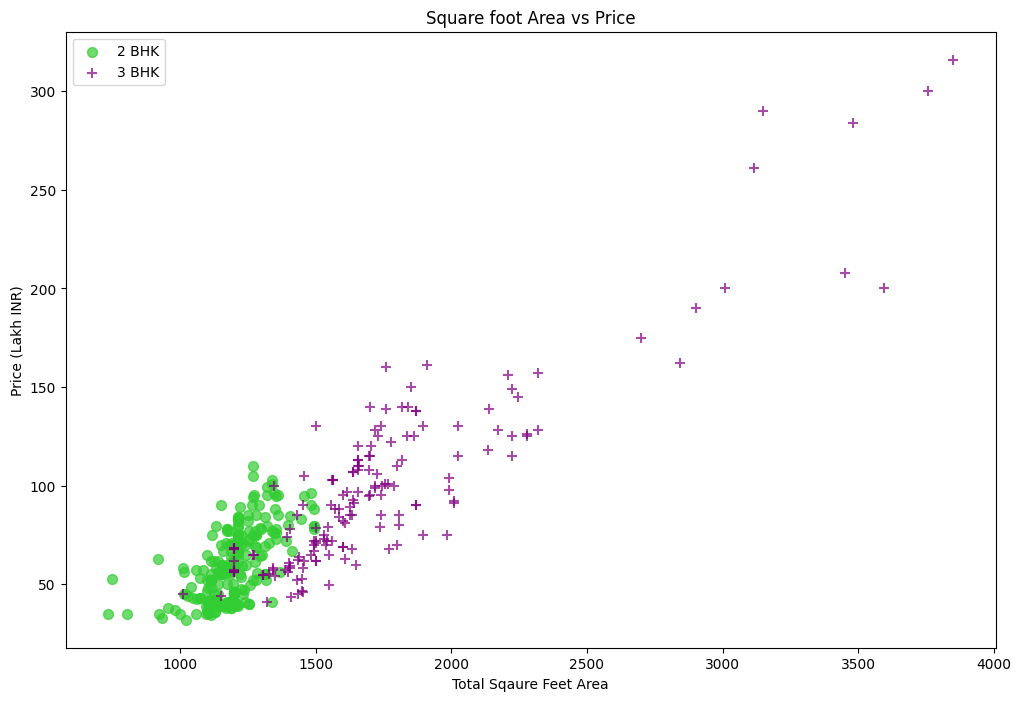

In [37]:
scatter_chart(df6, 'Whitefield')

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

```python
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [38]:

def remove_bhk_outliers(df):
    exclude_indices = []  # Use a list for more efficient index collection
    
    # Group by location and calculate statistics for each bhk
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        # Calculate mean, std, and count per bhk using agg to optimize performance
        bhk_stats = location_df.groupby('bhk')['price_per_sqft'].agg(['mean', 'std', 'count']).to_dict('index')
        
        # Iterate over each bhk to find outliers
        for bhk, bhk_df in location_df.groupby('bhk'):
            if bhk > 1:  # Ensure we have data for the previous BHK (e.g., 2 BHK for comparison with 1 BHK)
                prev_bhk_stats = bhk_stats.get(bhk - 1)
                if prev_bhk_stats and prev_bhk_stats['count'] > 5:
                    # Identify rows where price_per_sqft is lower than the mean price_per_sqft of the previous BHK
                    outliers = bhk_df[bhk_df['price_per_sqft'] < prev_bhk_stats['mean']]
                    exclude_indices.extend(outliers.index.values)
    
    # Drop the identified outliers
    return df.drop(index=exclude_indices)

# Apply the function
df7 = remove_bhk_outliers(df6)

# Output the shape of the cleaned DataFrame
print(df7.shape)


(7376, 7)


**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

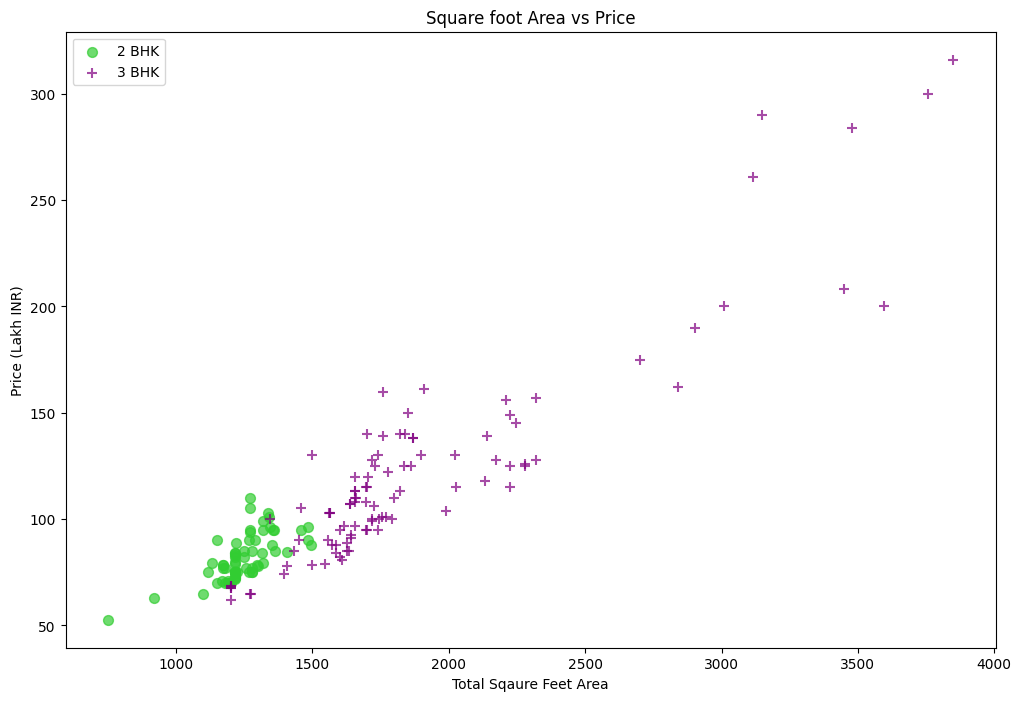

In [39]:
scatter_chart(df7, 'Whitefield')

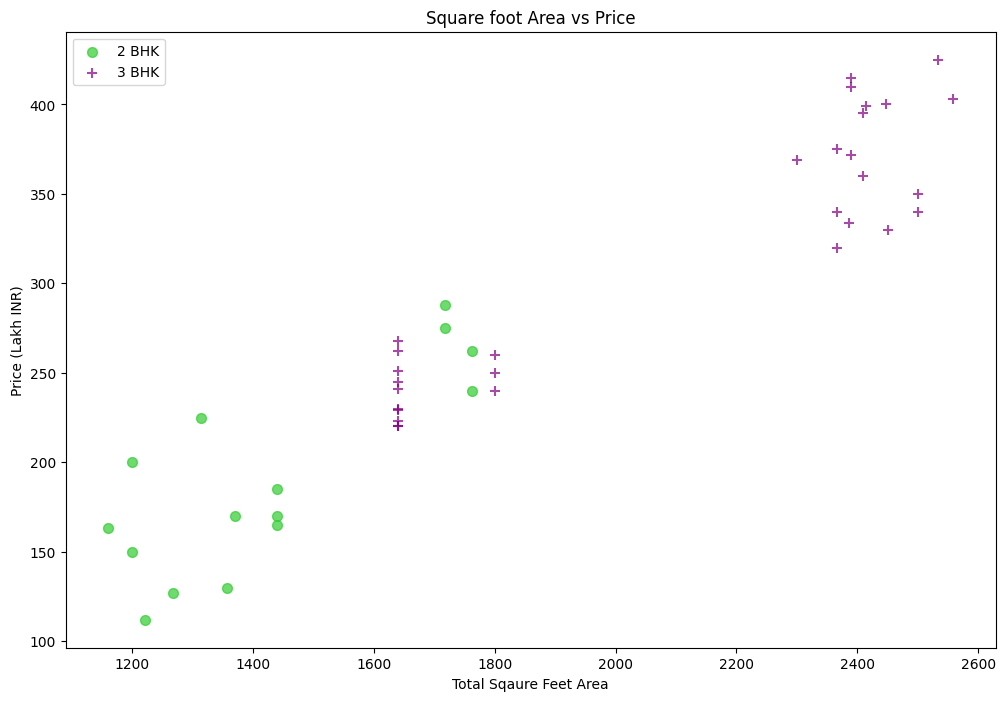

In [40]:
scatter_chart(df7, 'Rajaji Nagar')

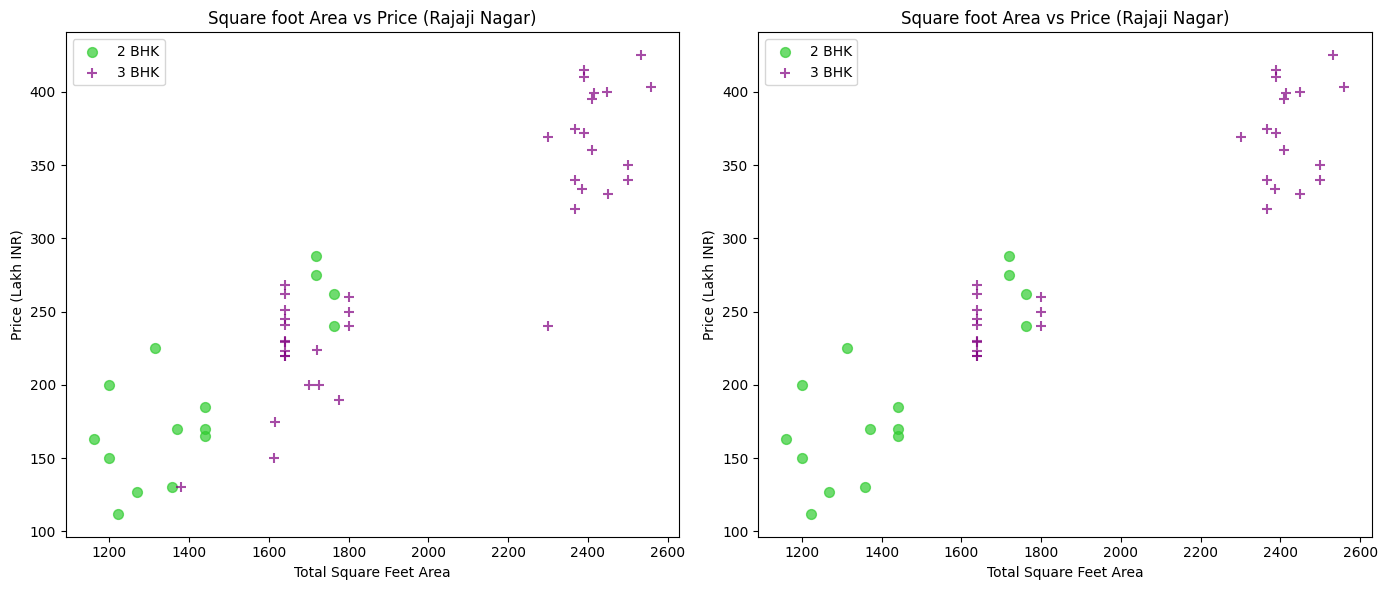

In [41]:
# Defining a simple scatter funtion to compare the visualizations for before and after outlier removal

def scatter_chart2(ax, df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]

 # Plot 2 BHK and 3 BHK for the provided dataframe on the given axis (ax)
    ax.scatter(bhk2.total_sqft, bhk2.price, color='limegreen', label='2 BHK', s=50, alpha=0.7)
    ax.scatter(bhk3.total_sqft, bhk3.price, color='purple', marker='+', label='3 BHK', s=50, alpha=0.7)
    
    ax.set_xlabel('Total Square Feet Area')
    ax.set_ylabel('Price (Lakh INR)')
    ax.set_title(f'Square foot Area vs Price ({location})')
    ax.legend()

# Create subplots to compare df6 and df7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for df6
scatter_chart2(ax1, df6, 'Rajaji Nagar')

# Plot for df7
scatter_chart2(ax2, df7, 'Rajaji Nagar')

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

### <span style="color:GoldenRod ">**Before and After Outlier Removal: Rajaji Nagar**</span>

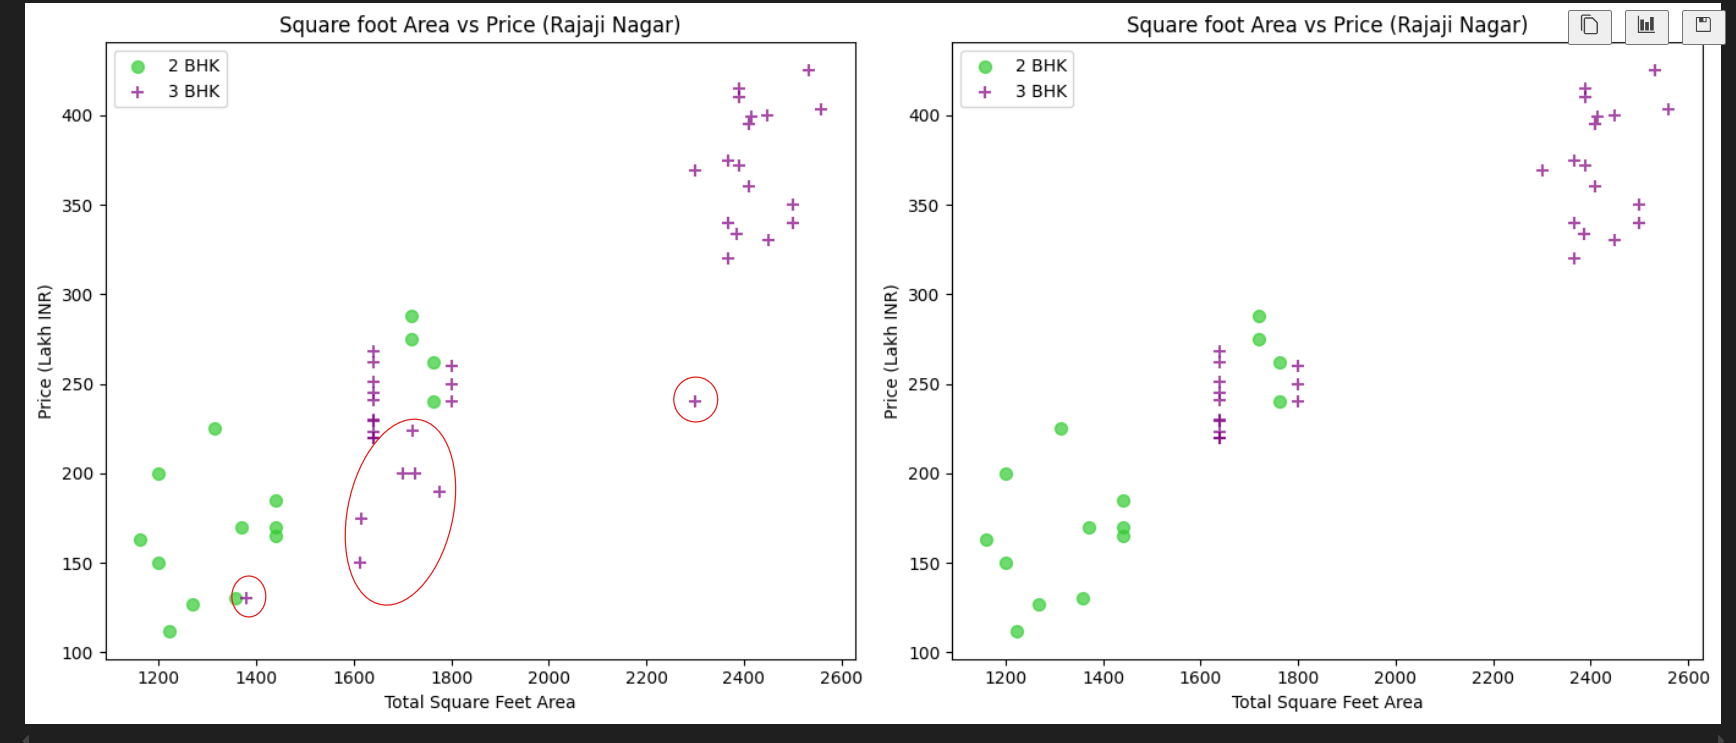

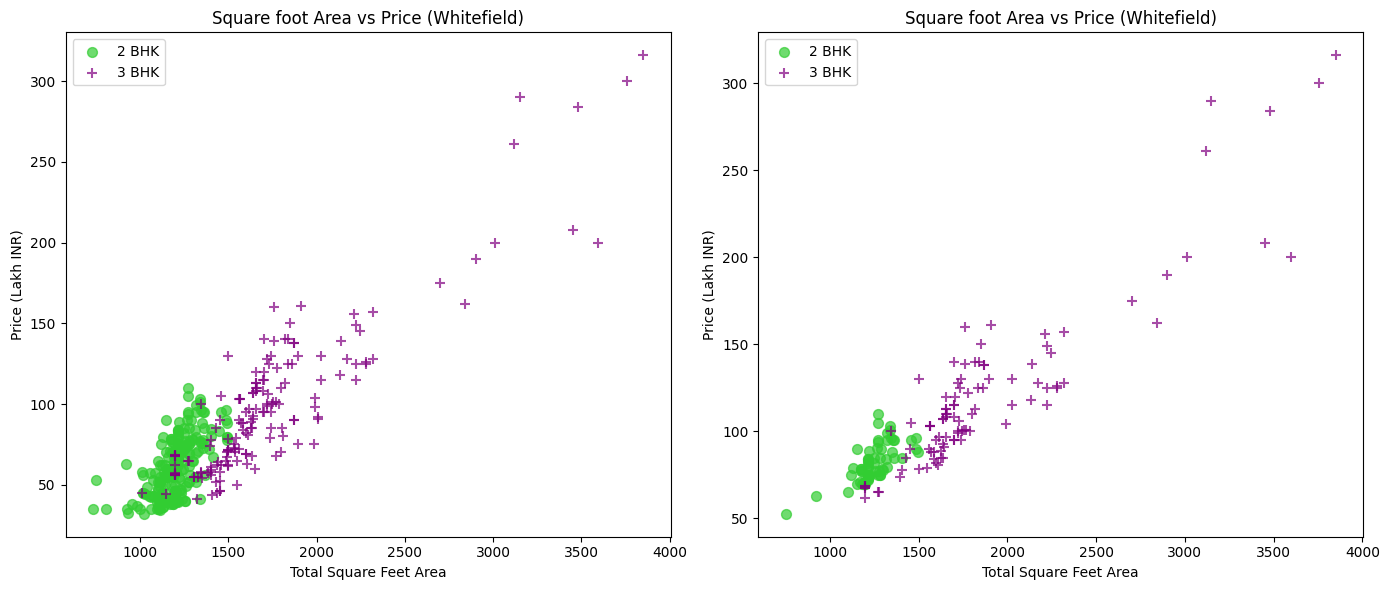

In [42]:
# Create subplots to compare df6 and df7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for df6
scatter_chart2(ax1, df6, 'Whitefield')

# Plot for df7
scatter_chart2(ax2, df7, 'Whitefield')

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

### <span style="color:GoldenRod ">**Before and After Outlier Removal: Whitefield**</span>

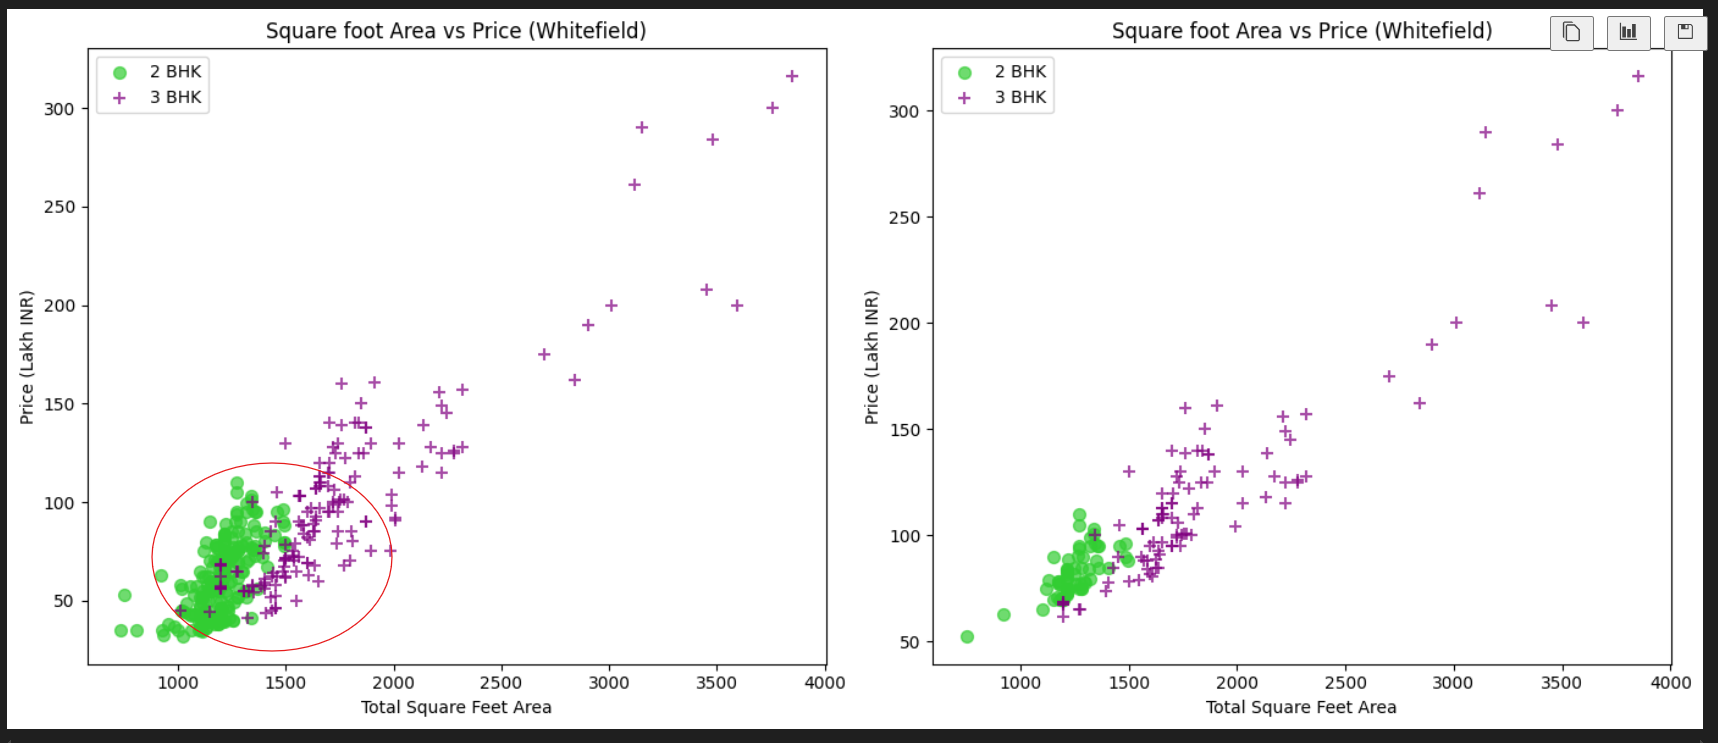

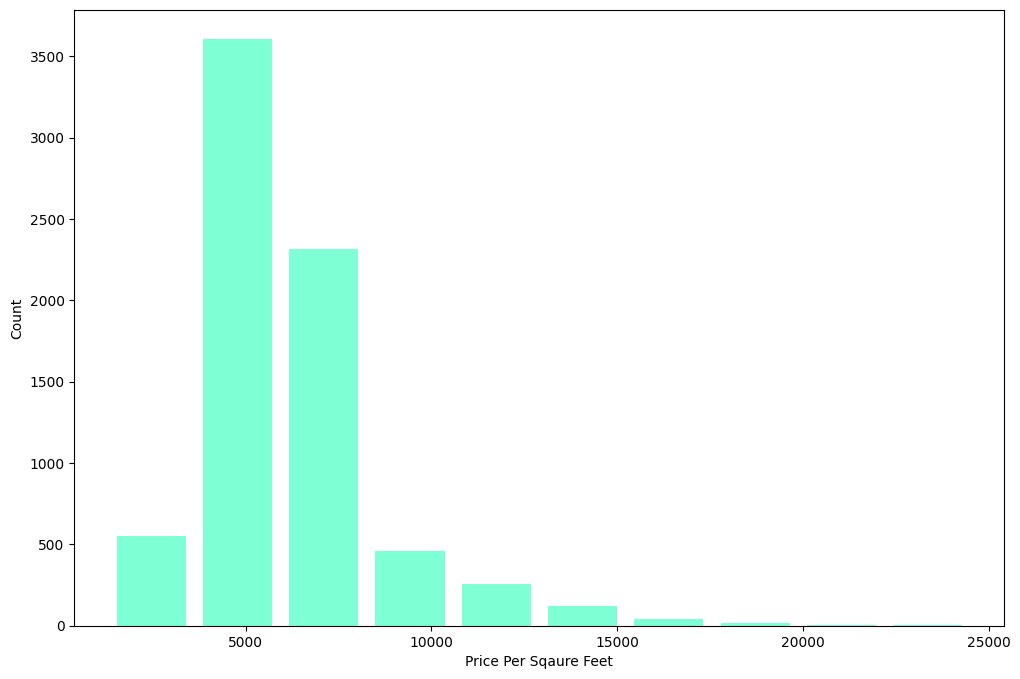

In [43]:
plt.figure(figsize=(12,8))
plt.hist(df7.price_per_sqft, rwidth=0.8, color='aquamarine')
plt.xlabel('Price Per Sqaure Feet')
plt.ylabel('Count')
plt.show()

### <span style="color:GoldenRod ">**Outlier Removal Using Bathrooms Feature**</span>

In [44]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

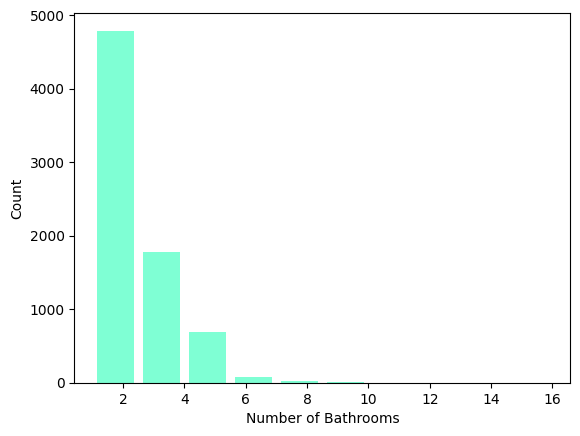

In [45]:
plt.hist(df7.bath, rwidth=0.8, color='aquamarine')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')


In [46]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5312,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8536,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8625,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9358,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9689,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [47]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6756,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8461,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [48]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7297, 7)

In [49]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [50]:
df9=df8.drop(['size', 'price_per_sqft'], axis=1)
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
df9.shape

(7297, 5)

### <span style="color:GoldenRod ">**Use One Hot Encoding for Location**</span>

In [52]:
dummies=pd.get_dummies(df9.location, dtype='int')
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df10=pd.concat([df9, dummies.drop('other', axis=1)], axis=1)    #axis = 1 outside [] means concatenate on columns
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11=df10.drop('location', axis=1)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <span style="color:GoldenRod ">**Let's Build a Model**</span>

In [55]:
df11.shape

(7297, 245)

In [56]:
X=df11.drop(['price'], axis=1)
y=df11.price

In [57]:
X.shape

(7297, 244)

In [58]:
y.shape

(7297,)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8163272504868203

### <span style="color:GoldenRod ">**Using K Fold cross validation to measure the accuracy of our LinearRegression Model**</span>

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79156627, 0.80518683, 0.8623199 , 0.83998208, 0.8676077 ])

**We see that over 4 iterations we get a score of more than 80% consistently. Now let's test other algorithms to see if we can get a better score than LinearRegressoin, we will GridSearchCV**

### <span style="color:GoldenRod ">**Find the best model using GridSearchCV**</span>

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def finding_best_model(X, y):
    # Define the models
    model_params={
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),   # Add scaling step
                ('lr', LinearRegression()) 
            ]),
            'params': {
                'lr__fit_intercept': [True, False],         # it's lr__fit_intercept with an extra _ in lr
            }
        },
        'decision_tree_reg':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cylic']
            }
        }

    }
    # Iterate through models and parameters
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for model_name, mparams in model_params.items():
        gscv=GridSearchCV(mparams['model'], mparams['params'], cv=cv, return_train_score=False)
        gscv.fit(X,y)        # Train on the provided dataset
        scores.append({
            'model': model_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
finding_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.833333,{'lr__fit_intercept': True}
1,decision_tree_reg,0.748467,"{'criterion': 'squared_error', 'splitter': 'be..."
2,lasso,0.678328,"{'alpha': 1, 'selection': 'random'}"


**Based on the above, we can conclude that LinearRegression gives the best score**

### <span style="color:GoldenRod ">**Test the model for properties**</span>

In [63]:
def predict_price(location, sqft, bath, bhk):
    # Find the index of the column corresponding to the location in the dataset
    loc_index = np.where(X.columns==location)[0][0]

    # Initialize a feature vector of zeros with the same length as the number of columns in the dataset
    x = np.zeros(len(X.columns))

    # Set the numeric features (square footage, number of bathrooms, and BHK)
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Set the location column to 1 in the one-hot encoding if the location is valid
    if loc_index >= 0:
        x[loc_index] = 1

    # Predict the price using the trained linear regression model
    return lr_clf.predict([x])[0]



In [64]:
predict_price('1st Phase JP Nagar', 2500, 5, 5)

221.14787738024512

In [65]:
predict_price('Whitefield', 2800, 4, 4)

202.56291956647078

### <span style="color:GoldenRod ">**Export the tested model to a pickle file**</span>

In [66]:
filepath=r"F:\Machine Learning all Algorithms\Previous Company Project\Real Estate Price Prediction\bangalore_home_prices_model.pickle"

import pickle
with open (filepath, 'wb') as f:
    pickle.dump(lr_clf, f)


### <span style="color:GoldenRod ">**Export location and column information to a file that will be useful later on in our prediction application**</span>

In [67]:
filepath2=r"F:\Machine Learning all Algorithms\Previous Company Project\Real Estate Price Prediction\columns.json"

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open(filepath2, 'w') as f:
    f.write(json.dumps(columns))